In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing and exploring the Data

In [56]:
data = pd.read_csv('C:/Users/CEA/Downloads/housing data.csv')

In [57]:
type(data)

pandas.core.frame.DataFrame

In [58]:
data.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,MnPrv,Shed,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,NaN,NaN,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,NaN,Shed,200000
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,NaN,NaN,129500


In [59]:
print('No of records: ',data.shape[0])
print('No of columns: ',data.shape[1])

No of records:  1418
No of columns:  13


In [60]:
data.tail()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125
1417,1418,5,1965,1256,SBrkr,1256,1,Attchd,1,276,NaN,NaN,147500


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


From the above info we can see that there are missing values in Electrical, Garage Type,Fence, MiscFeatures

In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


From the above describe we can get a Hint of outliers in TotalBsmtSF, GrLivArea,GarageArea, SalePrice

In [63]:
data.describe(include=object)

,Electrical,GarageType,Fence,MiscFeature
count,1417,1275,270,52
unique,5,6,4,4
top,SBrkr,Attchd,MnPrv,Shed
freq,1300,800,148,47


In [64]:
data.corr()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.029188,-0.017960,-0.019396,0.002991,-0.000113,0.015633,0.014457,-0.029967
OverallQual,-0.029188,1.000000,0.584692,0.545747,0.592881,0.550112,0.609104,0.567796,0.791478
YearBuilt,-0.017960,0.584692,1.000000,0.396971,0.204757,0.478441,0.550275,0.492807,0.528006
TotalBsmtSF,-0.019396,0.545747,0.396971,1.000000,0.456365,0.326705,0.442614,0.495600,0.619852
GrLivArea,0.002991,0.592881,0.204757,0.456365,1.000000,0.626942,0.472139,0.470736,0.709503
FullBath,-0.000113,0.550112,0.478441,0.326705,0.626942,1.000000,0.473365,0.408453,0.562269
GarageCars,0.015633,0.609104,0.550275,0.442614,0.472139,0.473365,1.000000,0.884674,0.647676
GarageArea,0.014457,0.567796,0.492807,0.495600,0.470736,0.408453,0.884674,1.000000,0.627264
SalePrice,-0.029967,0.791478,0.528006,0.619852,0.709503,0.562269,0.647676,0.627264,1.000000


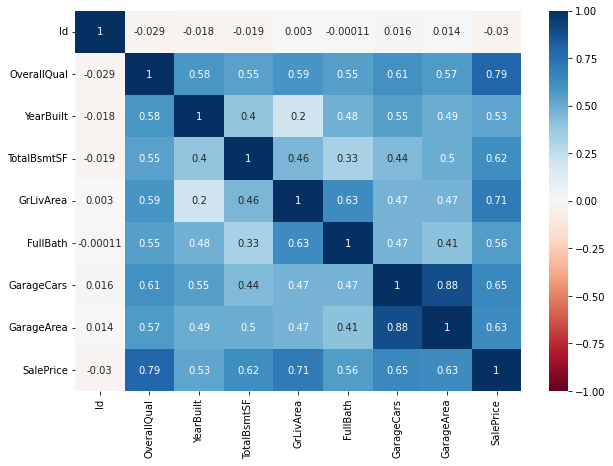

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, vmax=1,vmin=-1, cmap='RdBu')
plt.show()

In [66]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

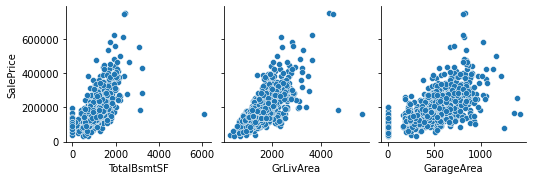

In [67]:
sns.pairplot(x_vars=['TotalBsmtSF', 'GrLivArea','GarageArea'],y_vars=['SalePrice'],data=data)
plt.show()

## Univariate and Bivariate Analysis

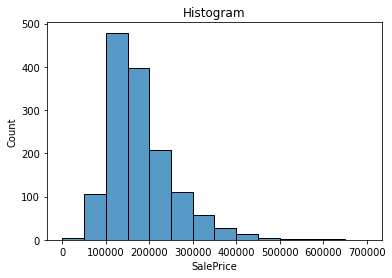

In [68]:
# Explare the Target Variable (SalePrice)
sns.histplot(data['SalePrice'],bins=range(0,750000,50000))
plt.title('Histogram')

plt.show()

Skewness:  1.8646120239750106
Kurtosis:  6.432852054835754


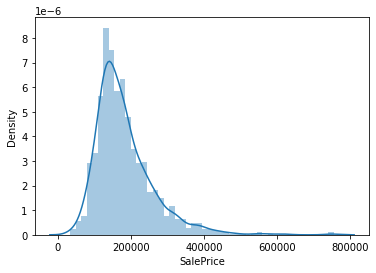

In [69]:
sns.distplot(data['SalePrice'])
print('Skewness: ',data['SalePrice'].skew())
print('Kurtosis: ',data['SalePrice'].kurt())
plt.show()

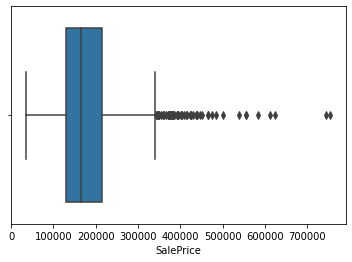

In [70]:
sns.boxplot(data['SalePrice'])
plt.show()

In [71]:
# Explore the SalePrice with some categorical columns (OverallQual,GarageType,Electrical)

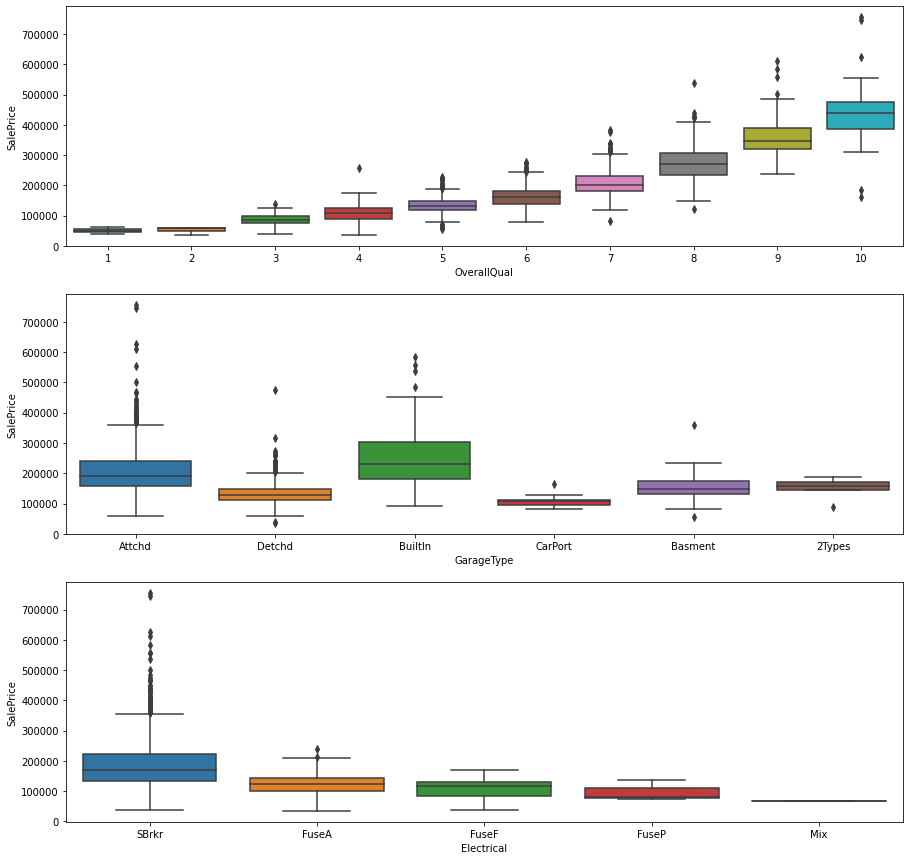

In [72]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.boxplot(x=data['OverallQual'],y=data['SalePrice'])
plt.subplot(3,1,2)
sns.boxplot(x=data['GarageType'],y=data['SalePrice'])
plt.subplot(3,1,3)
sns.boxplot(x=data['Electrical'],y=data['SalePrice'])
plt.show()

In [73]:
# Perform statistical test on SalePrice on the basis of overall quality

In [74]:
price_a = data[data['OverallQual']<=5]['SalePrice']
price_b = data[data['OverallQual']>5]['SalePrice']

In [75]:
from statsmodels.stats.weightstats import ztest,ttest_ind

In [76]:
# H0: There is no difference in Sample a and Sample b
# H1: The two samples are different

z_score,p_value = ztest(price_a,price_b)
print('z-score: ',z_score)
print('p-value: ',p_value)
if p_value<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

z-score:  -23.626614342802807
p-value:  2.0535400662857033e-123
Accept The H1:


In [77]:
data['GarageType'].value_counts()

Attchd     800
Detchd     354
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [78]:
data['GarageCars'].value_counts()

2    787
1    364
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [79]:
from scipy.stats import chi2_contingency

In [80]:
observed = pd.crosstab(data['GarageCars'],data['GarageType'])

In [81]:
# H0: The two columns Independent
# H1: The two columns are dependent

chi,p,dof,expected = chi2_contingency(observed)
print('Chi sq: ',chi)
print('p-value: ',p)
if p<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

Chi sq:  303.7522700344729
p-value:  9.277832977712945e-56
Accept The H1:


In [82]:
pd.DataFrame(expected)

,0,1,2,3,4,5
0,1.421176,189.490196,4.500392,20.607059,2.131765,83.849412
1,3.703529,493.803922,11.727843,53.701176,5.555294,218.508235
2,0.851765,113.568627,2.697255,12.350588,1.277647,50.254118
3,0.023529,3.137255,0.074510,0.341176,0.035294,1.388235


## Exploring and Treating the Missing Values

In [83]:
data.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [84]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [85]:
# First Let us treat the missing values in Electrical
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [86]:
data['Electrical'].mode()

0    SBrkr
dtype: object

In [87]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [88]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [89]:
# Next let us treat the Garage Type column

In [90]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [91]:
data['GarageType'].value_counts()

Attchd     800
Detchd     354
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [92]:
data['GarageType'] = np.where(data['GarageArea']==0,'NoGarage',data['GarageType'])

In [93]:
data_garagetype_null = data[data['GarageType'].isnull()]

In [94]:
data['GarageType'].value_counts()

Attchd      800
Detchd      354
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [95]:
data_garagetype_null['GarageCars'].value_counts()

1    62
Name: GarageCars, dtype: int64

In [96]:
data['GarageCars'].value_counts()

2    787
1    364
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [97]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
dtype: object

In [98]:
data['GarageType'].fillna(data[data['GarageCars']==1]['GarageType'].mode()[0],inplace=True)

In [99]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [100]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
Electrical      0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageType      0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [101]:
data.drop(columns=['MiscFeature','Fence'],inplace=True)

In [102]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Id             0.0
OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

## Exploring and treating the outliers

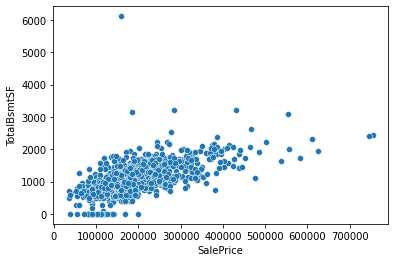

In [103]:
sns.scatterplot(x='SalePrice',y='TotalBsmtSF',data=data)
plt.show()

<AxesSubplot:xlabel='TotalBsmtSF'>

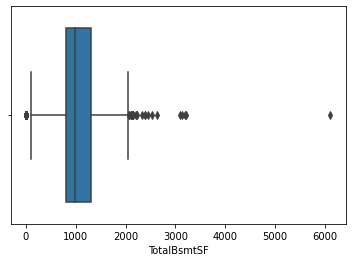

In [104]:
sns.boxplot(data['TotalBsmtSF'])

In [105]:
data[data['TotalBsmtSF']>5000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [106]:
data.drop(index=[1260],inplace=True)

<AxesSubplot:xlabel='TotalBsmtSF'>

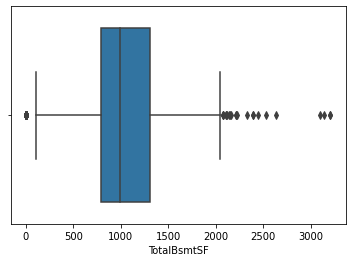

In [107]:
sns.boxplot(data['TotalBsmtSF'])

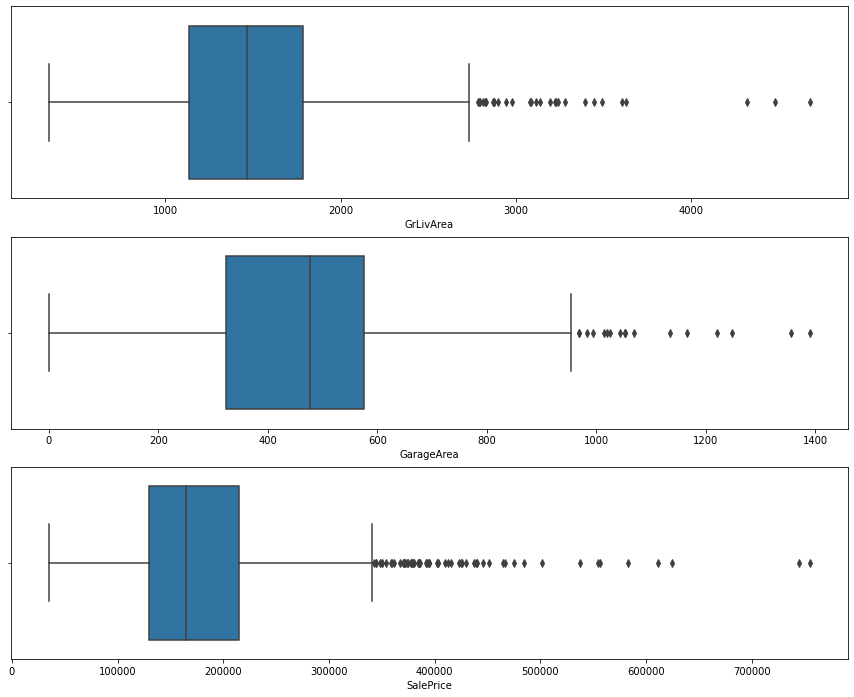

In [111]:
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
sns.boxplot(data['GrLivArea'])
plt.subplot(3,1,2)
sns.boxplot(data['GarageArea'])
plt.subplot(3,1,3)
sns.boxplot(data['SalePrice'])
plt.show()

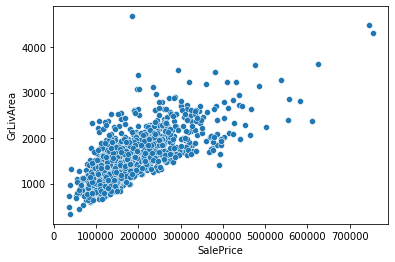

In [115]:
sns.scatterplot(x = 'SalePrice',y='GrLivArea',data=data)
plt.show()

In [112]:
data[data['SalePrice']>700000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [116]:
data[data['GrLivArea']>4000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [117]:
data.drop(index=[500],inplace=True)

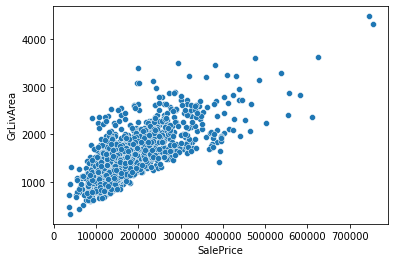

In [118]:
sns.scatterplot(x = 'SalePrice',y='GrLivArea',data=data)
plt.show()

In [119]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1416.0,709.257768,409.474995,1.0,354.75,709.5,1063.25,1418.0
OverallQual,1416.0,6.108757,1.379110,1.0,5.00,6.0,7.00,10.0
YearBuilt,1416.0,1971.550141,30.055196,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1416.0,1056.680791,412.794439,0.0,796.00,993.5,1302.00,3206.0
GrLivArea,1416.0,1514.504944,509.392098,334.0,1131.75,1467.0,1784.50,4476.0
FullBath,1416.0,1.564266,0.550073,0.0,1.00,2.0,2.00,3.0
GarageCars,1416.0,1.762712,0.755789,0.0,1.00,2.0,2.00,4.0
GarageArea,1416.0,471.659605,214.474979,0.0,323.50,478.0,576.00,1390.0
SalePrice,1416.0,182103.206921,80025.243732,34900.0,130000.00,164800.0,215000.00,755000.0


## Feature Selection

In [120]:
data.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,200000
8,9,5,1939,991,SBrkr,1077,1,Detchd,1,205,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,129500


In [121]:
# We need to drop GarageCars as there is multicolinearity between garage cars and garage area
data.drop(columns=['Id','GarageCars'],inplace=True)

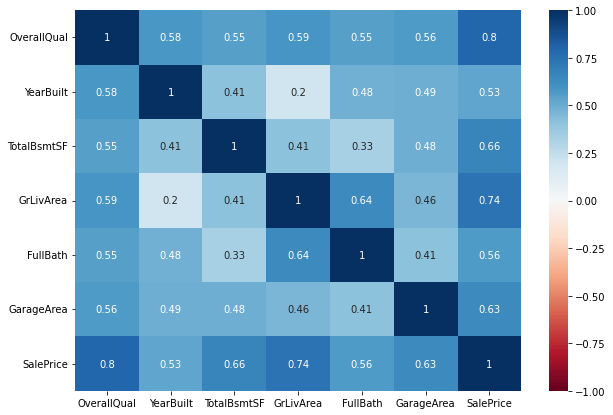

In [122]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, vmax=1,vmin=-1, cmap='RdBu')
plt.show()

## Feature Engineering

In [124]:
data.head(10)

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageArea,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,548,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,460,181500
2,7,2001,920,SBrkr,1786,2,Attchd,608,223500
3,7,1915,756,SBrkr,1717,1,Detchd,642,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,836,250000
5,5,1993,796,SBrkr,1362,1,Attchd,480,143000
6,8,2004,1686,SBrkr,1694,2,Attchd,636,307000
7,7,1973,1107,SBrkr,2090,2,Attchd,484,200000
8,5,1939,991,SBrkr,1077,1,Detchd,205,118000
9,5,1965,1040,SBrkr,1040,1,Detchd,384,129500


In [125]:
data = pd.get_dummies(data)

In [126]:
data.head(10)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,2003,856,1710,2,548,208500,0,0,0,0,1,0,1,0,0,0,0,0
1,6,1976,1262,1262,2,460,181500,0,0,0,0,1,0,1,0,0,0,0,0
2,7,2001,920,1786,2,608,223500,0,0,0,0,1,0,1,0,0,0,0,0
3,7,1915,756,1717,1,642,140000,0,0,0,0,1,0,0,0,0,0,1,0
4,8,2000,1145,2198,2,836,250000,0,0,0,0,1,0,1,0,0,0,0,0
5,5,1993,796,1362,1,480,143000,0,0,0,0,1,0,1,0,0,0,0,0
6,8,2004,1686,1694,2,636,307000,0,0,0,0,1,0,1,0,0,0,0,0
7,7,1973,1107,2090,2,484,200000,0,0,0,0,1,0,1,0,0,0,0,0
8,5,1939,991,1077,1,205,118000,0,0,0,0,1,0,0,0,0,0,1,0
9,5,1965,1040,1040,1,384,129500,0,0,0,0,1,0,0,0,0,0,1,0


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1417
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   OverallQual          1416 non-null   int64
 1   YearBuilt            1416 non-null   int64
 2   TotalBsmtSF          1416 non-null   int64
 3   GrLivArea            1416 non-null   int64
 4   FullBath             1416 non-null   int64
 5   GarageArea           1416 non-null   int64
 6   SalePrice            1416 non-null   int64
 7   Electrical_FuseA     1416 non-null   uint8
 8   Electrical_FuseF     1416 non-null   uint8
 9   Electrical_FuseP     1416 non-null   uint8
 10  Electrical_Mix       1416 non-null   uint8
 11  Electrical_SBrkr     1416 non-null   uint8
 12  GarageType_2Types    1416 non-null   uint8
 13  GarageType_Attchd    1416 non-null   uint8
 14  GarageType_Basment   1416 non-null   uint8
 15  GarageType_BuiltIn   1416 non-null   uint8
 16  GarageType_CarPort   141

## Feature Scaling

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
sc = StandardScaler()

In [130]:
data_s = sc.fit_transform(data)

In [131]:
data_s

array([[ 0.6464733 ,  1.04677308, -0.48632363, ..., -0.07997868,
        -0.64498062, -0.24632125],
       [-0.07888818,  0.14810853,  0.49756423, ..., -0.07997868,
        -0.64498062, -0.24632125],
       [ 0.6464733 ,  0.98020533, -0.33122801, ..., -0.07997868,
        -0.64498062, -0.24632125],
       ...,
       [ 0.6464733 , -1.01682699,  0.23099363, ..., -0.07997868,
        -0.64498062, -0.24632125],
       [-0.80424967, -0.71727214,  0.05166431, ..., -0.07997868,
         1.55043418, -0.24632125],
       [-0.80424967, -0.21801406,  0.48302401, ..., -0.07997868,
        -0.64498062, -0.24632125]])

In [133]:
data_s = pd.DataFrame(data_s,columns=data.columns)

In [135]:
data_s.head(10)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,0.646473,1.046773,-0.486324,0.383917,0.792419,0.356067,0.329972,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
1,-0.078888,0.148109,0.497564,-0.495874,0.792419,-0.054383,-0.007540,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
2,0.646473,0.980205,-0.331228,0.533167,0.792419,0.635918,0.517479,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
3,0.646473,-1.882208,-0.728661,0.397663,-1.026163,0.794501,-0.526310,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,-1.137970,-0.116621,-0.254287,-0.079979,1.550434,-0.246321
4,1.371835,0.946921,0.214030,1.342260,0.792419,1.699355,0.848742,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
5,-0.804250,0.713934,-0.631726,-0.299492,-1.026163,0.038901,-0.488809,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
6,1.371835,1.080057,1.525073,0.352496,0.792419,0.766516,1.561269,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
7,0.646473,0.048257,0.121942,1.130167,0.792419,0.057558,0.223718,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,0.878758,-0.116621,-0.254287,-0.079979,-0.644981,-0.246321
8,-0.804250,-1.083395,-0.159169,-0.859180,-1.026163,-1.243753,-0.801320,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,-1.137970,-0.116621,-0.254287,-0.079979,1.550434,-0.246321
9,-0.804250,-0.218014,-0.040424,-0.931841,-1.026163,-0.408862,-0.657565,-0.258976,-0.131306,-0.046078,-0.026584,0.300115,-0.065233,-1.137970,-0.116621,-0.254287,-0.079979,1.550434,-0.246321
